In [1]:
import matplotlib.pyplot as plt
import simulated_parameter_vault
import simulated_pulse_sequence

In [2]:
%%time
simulated_pulse_sequence.initialize_julia()

Successfully initialized Julia and IonSim.jl
Wall time: 1min 7s


# Single-ion Rabi flopping

In [3]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 1)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "pmt")

In [4]:
%%time
rabi_result = simulated_pulse_sequence.run_simulation(
    "sequences/rabi_flopping.py",
    "RabiFlopping",
    {
        "RabiFlopping-Scan_Selection": "RabiFlopping.duration",
        "RabiFlopping:RabiFlopping.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 10e-6,
            "npoints": 50
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-23\RabiFlopping\0951_25_results_RabiFlopping.txt
Wall time: 26.2 s


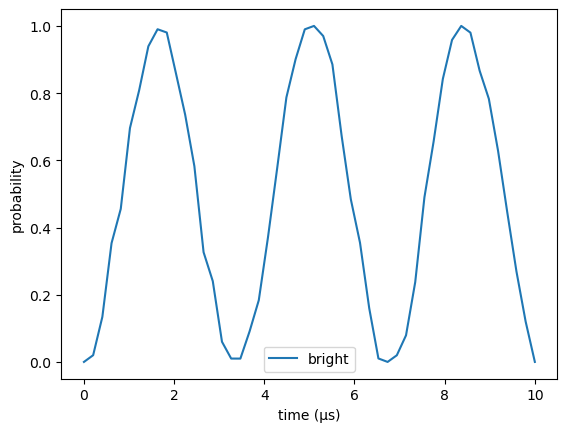

In [5]:
x = rabi_result['RabiFlopping']['x'] * 1e6
y = rabi_result['RabiFlopping']['y'][0]

plt.plot(x, y, label='bright')
plt.xlabel('time (μs)')
plt.ylabel('probability')
plt.legend()
plt.show()

In [6]:
print(rabi_result)

{'RabiFlopping': {'x': array([0.00000000e+00, 2.04081633e-07, 4.08163265e-07, 6.12244898e-07,
       8.16326531e-07, 1.02040816e-06, 1.22448980e-06, 1.42857143e-06,
       1.63265306e-06, 1.83673469e-06, 2.04081633e-06, 2.24489796e-06,
       2.44897959e-06, 2.65306122e-06, 2.85714286e-06, 3.06122449e-06,
       3.26530612e-06, 3.46938776e-06, 3.67346939e-06, 3.87755102e-06,
       4.08163265e-06, 4.28571429e-06, 4.48979592e-06, 4.69387755e-06,
       4.89795918e-06, 5.10204082e-06, 5.30612245e-06, 5.51020408e-06,
       5.71428571e-06, 5.91836735e-06, 6.12244898e-06, 6.32653061e-06,
       6.53061224e-06, 6.73469388e-06, 6.93877551e-06, 7.14285714e-06,
       7.34693878e-06, 7.55102041e-06, 7.75510204e-06, 7.95918367e-06,
       8.16326531e-06, 8.36734694e-06, 8.57142857e-06, 8.77551020e-06,
       8.97959184e-06, 9.18367347e-06, 9.38775510e-06, 9.59183673e-06,
       9.79591837e-06, 1.00000000e-05]), 'y': [array([0.        , 0.02      , 0.13402062, 0.35353535, 0.45544554,
       0.69

# Two-ion MS gate

In [7]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 2)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "camera_states")

simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning"], -7e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "amplitude"], 0.058)

## Duration scan

In [8]:
%%time
ms_result = simulated_pulse_sequence.run_simulation(
    "sequences/molmer_sorensen.py",
    "MolmerSorensenGate",
    {
        "MolmerSorensen-Scan_Selection": "MolmerSorensen.duration",
        "MolmerSorensen:MolmerSorensen.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 300e-6,
            "npoints": 30
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-23\MolmerSorensenGate\0951_51_results_MolmerSorensen.txt
Wall time: 10.4 s


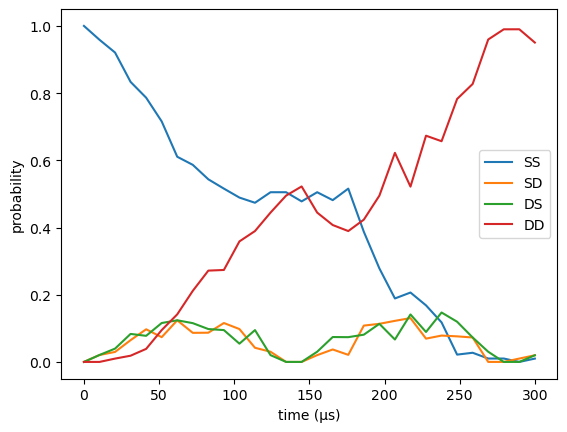

In [9]:
x = ms_result['MolmerSorensen']['x'] * 1e6
ds = ms_result['MolmerSorensen']['y'][0]
ss = ms_result['MolmerSorensen']['y'][1]
sd = ms_result['MolmerSorensen']['y'][2]
dd = ms_result['MolmerSorensen']['y'][3]

plt.plot(x, ss, label='SS')
plt.plot(x, sd, label='SD')
plt.plot(x, ds, label='DS')
plt.plot(x, dd, label='DD')
plt.xlabel('time (μs)')
plt.ylabel('probability')
plt.legend()
plt.show()

In [10]:
print(ms_result)

{'RabiFlopping': {'x': [], 'y': []}, 'MolmerSorensen': {'x': array([0.00000000e+00, 1.03448276e-05, 2.06896552e-05, 3.10344828e-05,
       4.13793103e-05, 5.17241379e-05, 6.20689655e-05, 7.24137931e-05,
       8.27586207e-05, 9.31034483e-05, 1.03448276e-04, 1.13793103e-04,
       1.24137931e-04, 1.34482759e-04, 1.44827586e-04, 1.55172414e-04,
       1.65517241e-04, 1.75862069e-04, 1.86206897e-04, 1.96551724e-04,
       2.06896552e-04, 2.17241379e-04, 2.27586207e-04, 2.37931034e-04,
       2.48275862e-04, 2.58620690e-04, 2.68965517e-04, 2.79310345e-04,
       2.89655172e-04, 3.00000000e-04]), 'y': [array([0.        , 0.02061856, 0.03960396, 0.08333333, 0.0776699 ,
       0.11578947, 0.12389381, 0.11538462, 0.09782609, 0.09473684,
       0.05434783, 0.09473684, 0.02020202, 0.        , 0.        ,
       0.03030303, 0.07407407, 0.07368421, 0.08108108, 0.11340206,
       0.06666667, 0.14130435, 0.08910891, 0.14705882, 0.11956522,
       0.07272727, 0.03030303, 0.        , 0.        , 0.019

## Sit at the gate time and scan the amplitude

In [11]:
simulated_parameter_vault.set_parameter(["MolmerSorensen", "duration"], 145e-6)

In [12]:
%%time
ms_result = simulated_pulse_sequence.run_simulation(
    "sequences/molmer_sorensen.py",
    "MolmerSorensenGate",
    {
        "MolmerSorensen-Scan_Selection": "MolmerSorensen.amplitude",
        "MolmerSorensen:MolmerSorensen.amplitude": {
            "ty": "RangeScan",
            "start": 0.0,
            "stop": 0.1,
            "npoints": 20
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-23\MolmerSorensenGate\0952_02_results_MolmerSorensen.txt
Wall time: 6.77 s


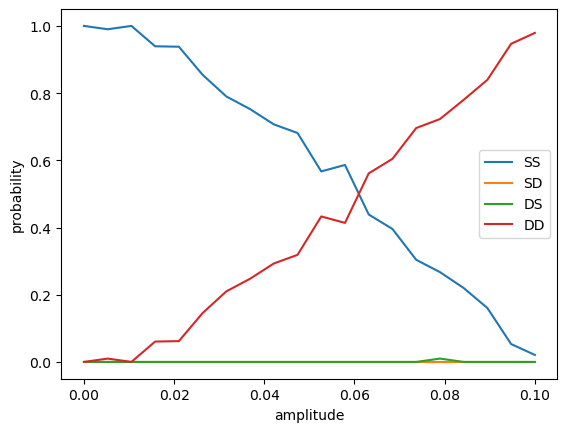

In [13]:
x = ms_result['MolmerSorensen']['x']
ds = ms_result['MolmerSorensen']['y'][0]
ss = ms_result['MolmerSorensen']['y'][1]
sd = ms_result['MolmerSorensen']['y'][2]
dd = ms_result['MolmerSorensen']['y'][3]

plt.plot(x, ss, label='SS')
plt.plot(x, sd, label='SD')
plt.plot(x, ds, label='DS')
plt.plot(x, dd, label='DD')
plt.xlabel('amplitude')
plt.ylabel('probability')
plt.legend()
plt.show()

In [14]:
print(ms_result)

{'RabiFlopping': {'x': [], 'y': []}, 'MolmerSorensen': {'x': array([0.        , 0.00526316, 0.01052632, 0.01578947, 0.02105263,
       0.02631579, 0.03157895, 0.03684211, 0.04210526, 0.04736842,
       0.05263158, 0.05789474, 0.06315789, 0.06842105, 0.07368421,
       0.07894737, 0.08421053, 0.08947368, 0.09473684, 0.1       ]), 'y': [array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00990099, 0.        , 0.        , 0.        , 0.        ]), array([1.        , 0.99009901, 1.        , 0.93939394, 0.93814433,
       0.85454545, 0.79      , 0.75247525, 0.70707071, 0.68131868,
       0.56701031, 0.5862069 , 0.43877551, 0.3956044 , 0.30392157,
       0.26732673, 0.22      , 0.16037736, 0.05319149, 0.02083333]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0.        , 0.009900